In [1]:
from PIL import Image, ImageFont, ImageDraw
import pandas as pd
from os import listdir
from os.path import isfile, join
from datetime import datetime
from pytz import timezone

In [2]:
files = [f for f in listdir("nexrad_downloads/May17/plots/") if isfile(join('nexrad_downloads/May17/plots/', f))]
files = list(filter(lambda x : x.endswith('.png') , files))
files.sort()

In [3]:
def createLabelTimestamp(filename):
    """
    This function replaces the current png file with a labelled version of the file
    """
    newyork_tz = timezone('America/New_York')
    utc = timezone('UTC')
    timestamp = filename.split("_")
    datepart = timestamp[0][4:8]+'-'+timestamp[0][8:10]+'-'+timestamp[0][10:12]
    timepart = timestamp[1][:2]+':'+timestamp[1][2:4]+':'+timestamp[1][4:6]
    utctimestamp = utc.localize(datetime.strptime(datepart+' '+timepart, '%Y-%m-%d %H:%M:%S'))
    nytime = utctimestamp.astimezone(newyork_tz)
    label = nytime.strftime("%d-%b-%Y (%H:%M:%S)")
    return("Local Time: "+label)


In [4]:
images = []
for f in files:
    label = createLabelTimestamp(f)
    # get the image
    font = ImageFont.truetype("fonts/OpenSans-Bold.ttf", 50)
    img = Image.open("nexrad_downloads/May17/plots/"+f)
    draw = ImageDraw.Draw(img)
    draw.text((425,200), label, (0,0,0), font=font)
    draw = ImageDraw.Draw(img)
    images.append(img)

In [5]:
images[0].save('KOKX20200517.gif', format='GIF', append_images=images[1:],
         save_all=True, duration=500, loop=0)

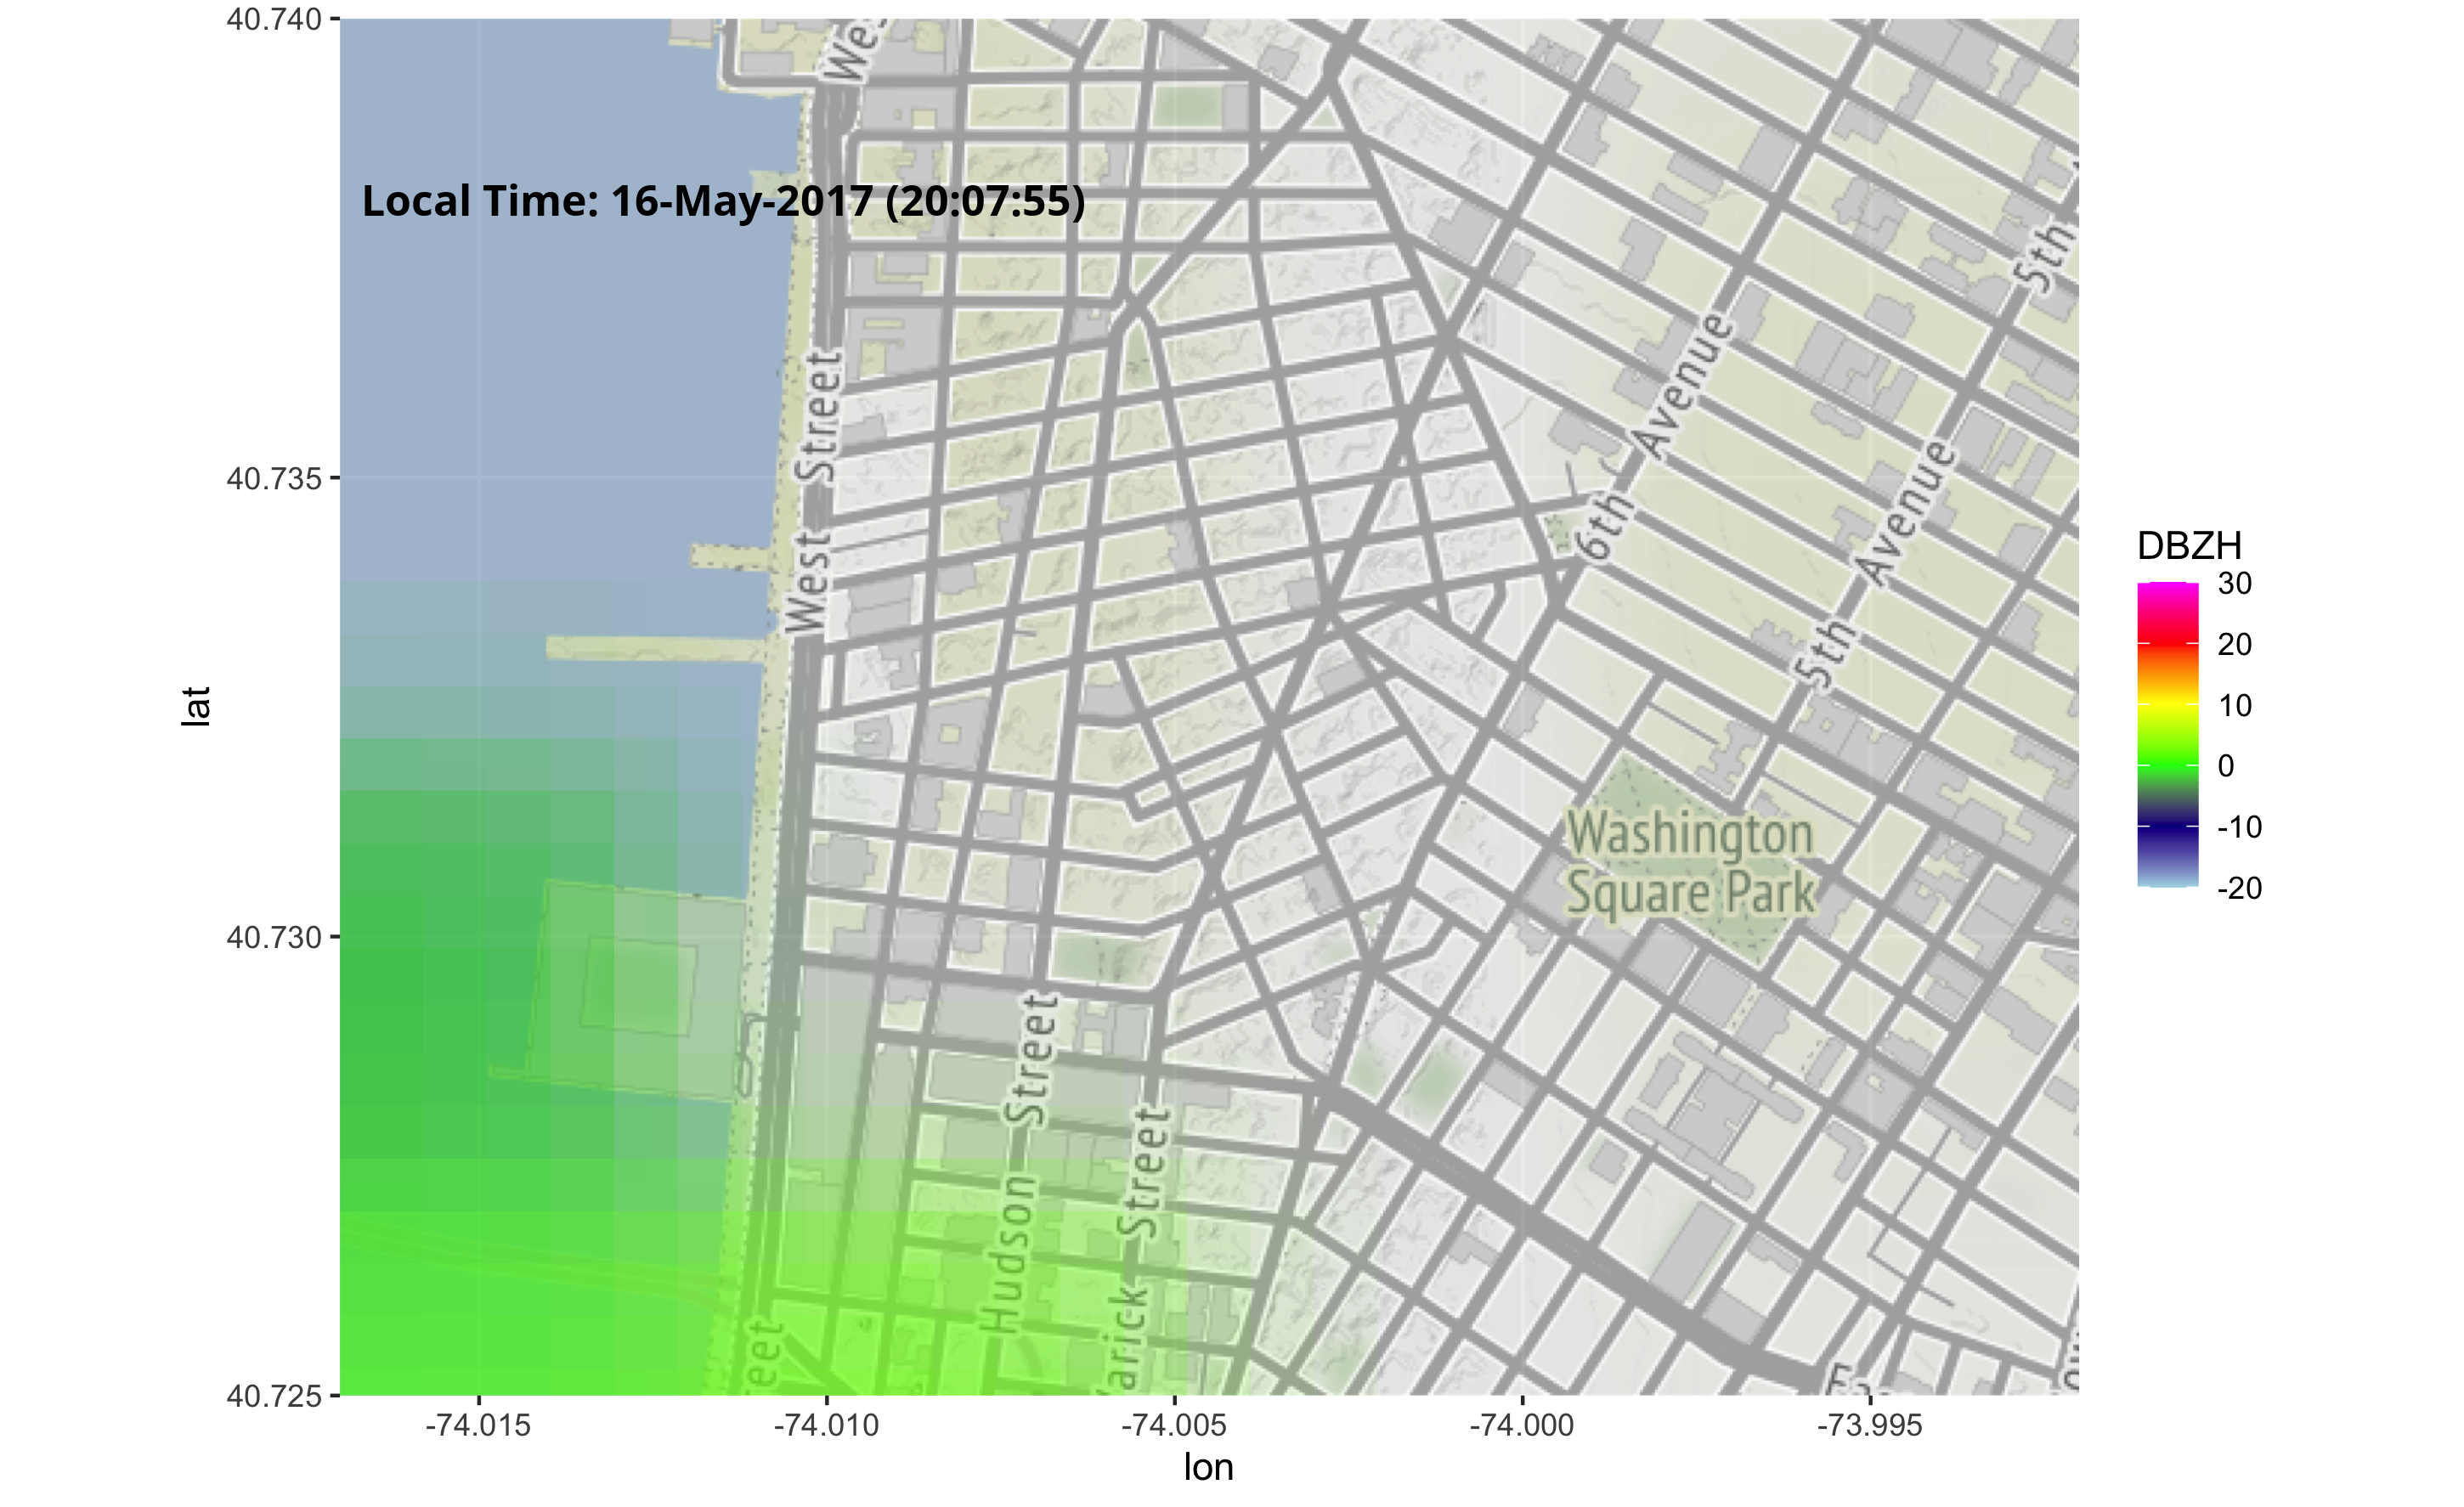

In [6]:
images[0]

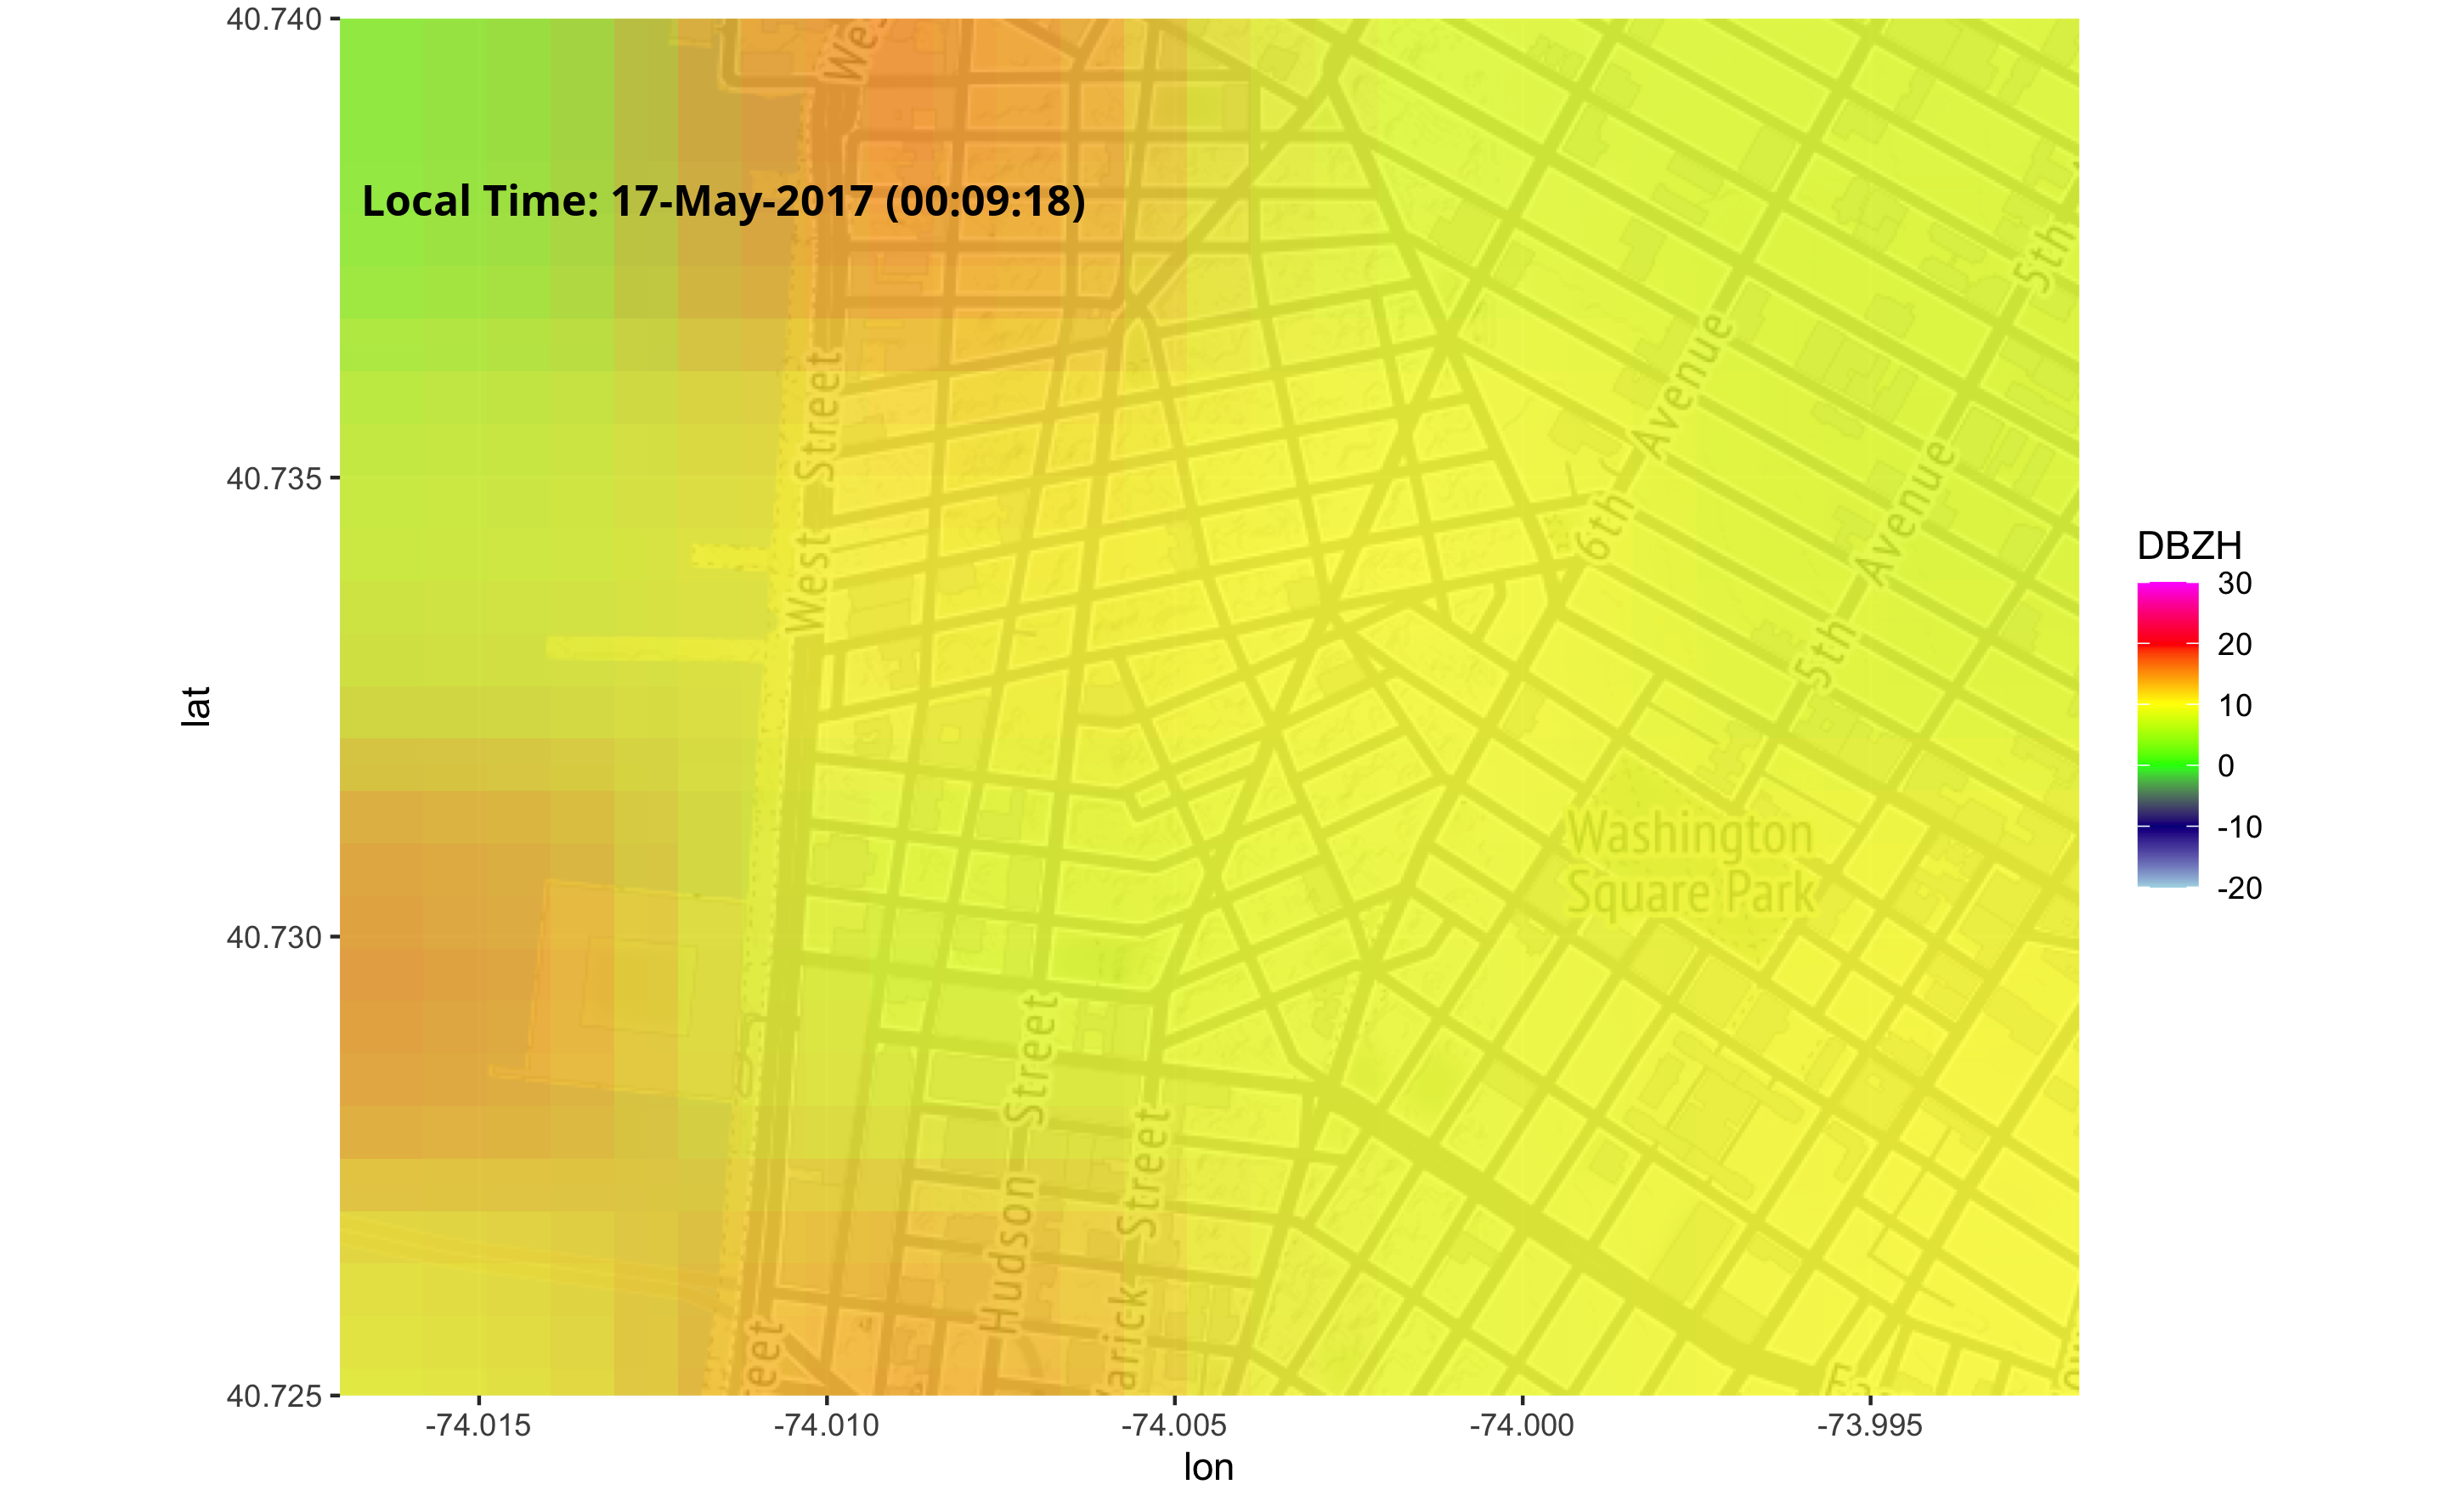

In [13]:
images[32]

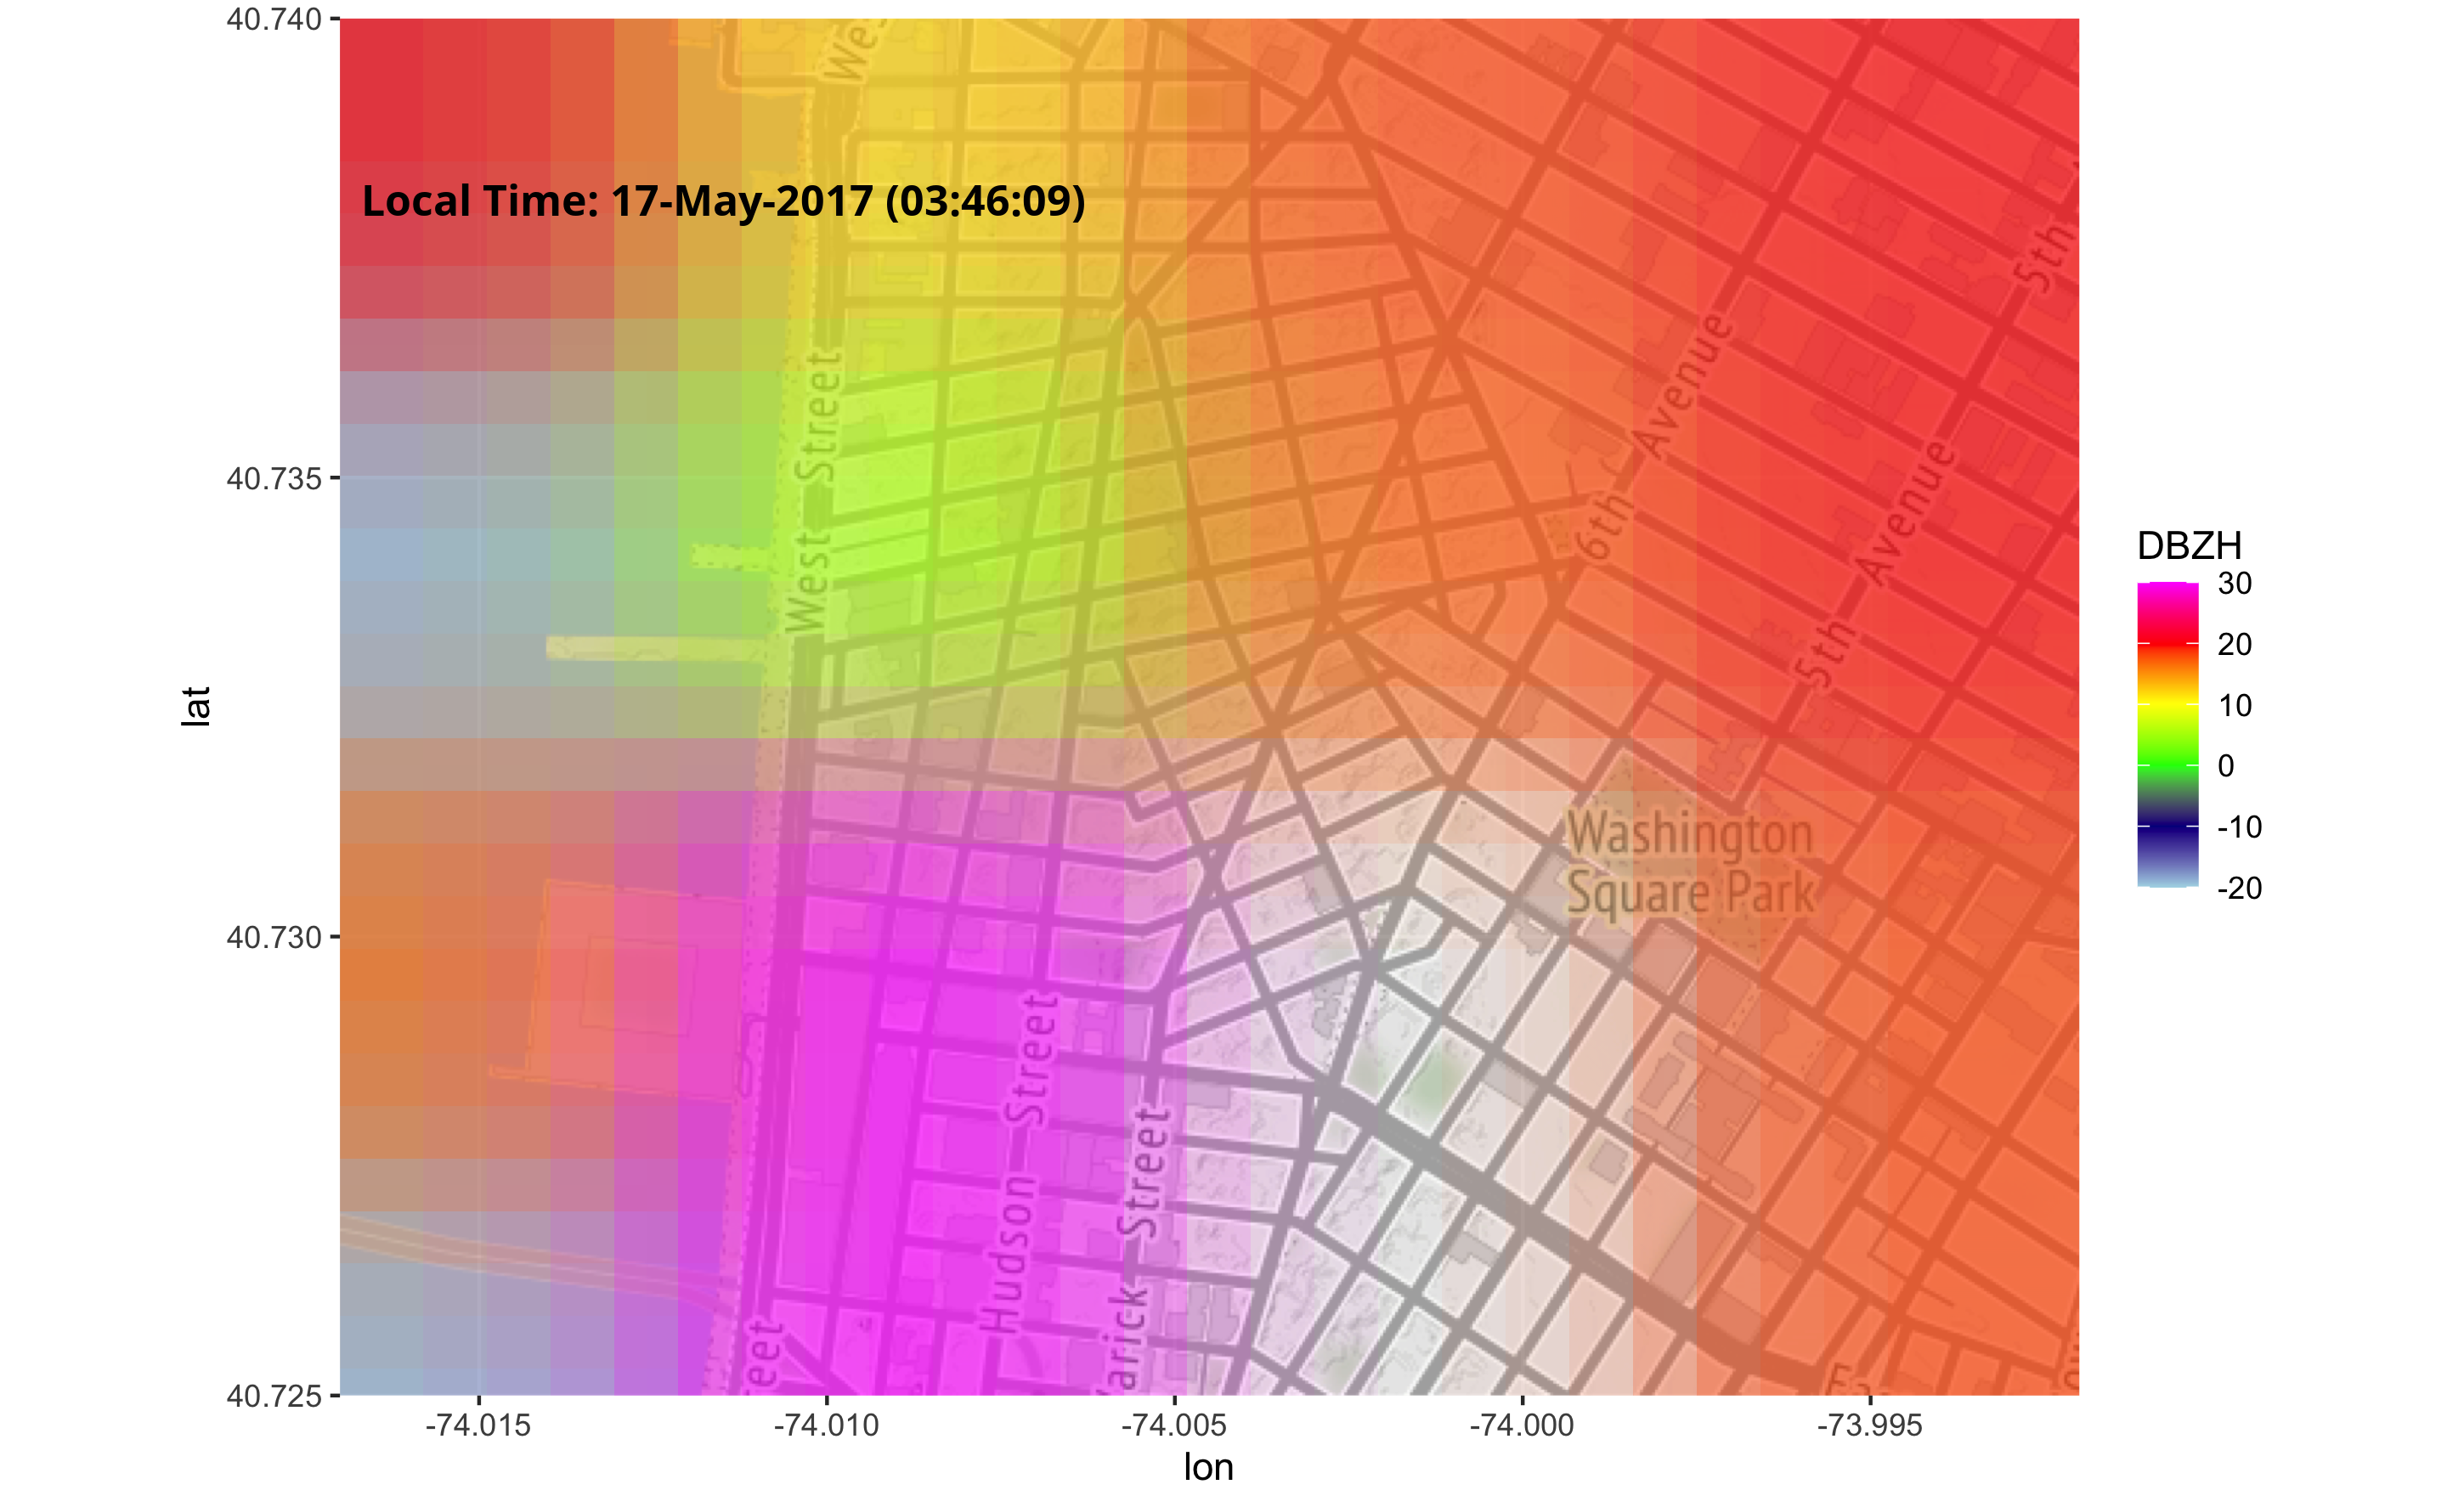

In [22]:
images[75]